In [7]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px
import plotly.graph_objects as go
import altair as alt    

In [2]:
# Load the dataset
df = pd.read_csv('ChurnData.csv')
# Display the first few rows of the dataset
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

**Visualization Strategy**
| Stage              | Goal                                     | Tools                              |
| ------------------ | ---------------------------------------- | ---------------------------------- |
| 1. **Exploratory** | Understand distributions, spot anomalies | Seaborn, Pandas, Plotly            |
| 2. **Explanatory** | Show *why* customers churn               | Plotly, Altair, Dash               |
| 3. **Predictive**  | Show what factors drive churn in models  | SHAP, Yellowbrick, Plotly          |
| 4. **Operational** | Build dashboards for execs               | Dash, Streamlit, Tableau, Power BI |


1. Churn Distribution and Class Imbalance
- Bar plot: Show churned vs non-churned customers.

- Pie chart (interactive): For quick stakeholder snapshots.



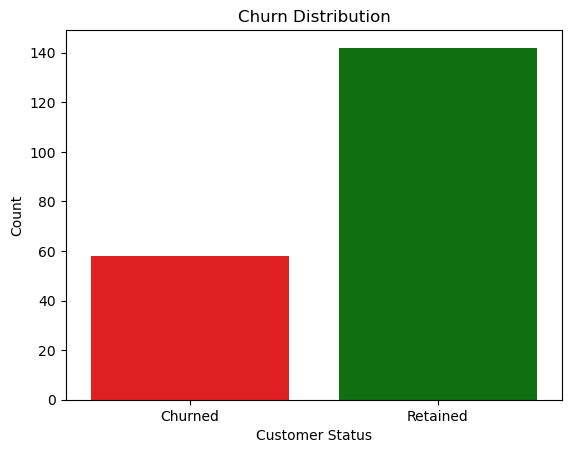

In [34]:
# Rename churn column to categorical for better legends
df['churn_label'] = df['churn'].map({0.0: 'Retained', 1.0: 'Churned'})

# 1. Churn Distribution (Bar)
fig1 = px.histogram(df, x='churn_label', color='churn_label',
                    title='Churn Distribution', 
                    color_discrete_map={'Retained': 'green', 'Churned': 'red'})
fig1.update_layout(showlegend=False)

fig1.show()




# Bar chart of churn
sns.countplot(data=df, x='churn_label', palette={'Retained': 'green', 'Churned': 'red'})
plt.title("Churn Distribution")
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.show()


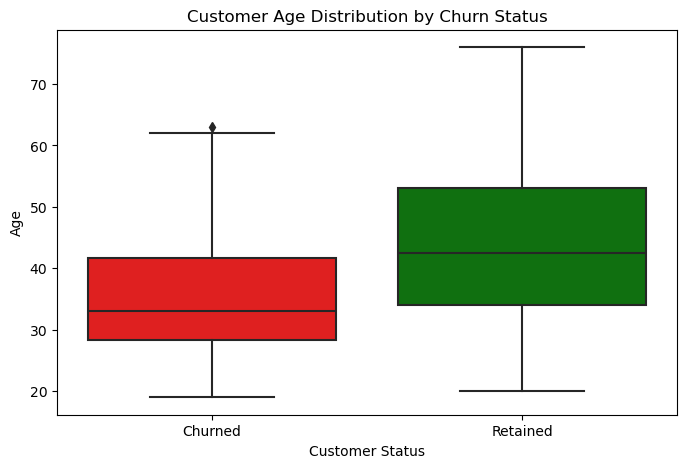

In [33]:
# 2. Age vs Churn (Box Plot)
fig2 = px.box(df, x='churn_label', y='age', color='churn_label',
              title='Customer Age Distribution by Churn Status',
              color_discrete_map={'Retained': 'green', 'Churned': 'red'})
fig2.show()



plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn_label', y='age', palette={'Retained': 'green', 'Churned': 'red'})
plt.title("Customer Age Distribution by Churn Status")
plt.xlabel("Customer Status")
plt.ylabel("Age")
plt.show()



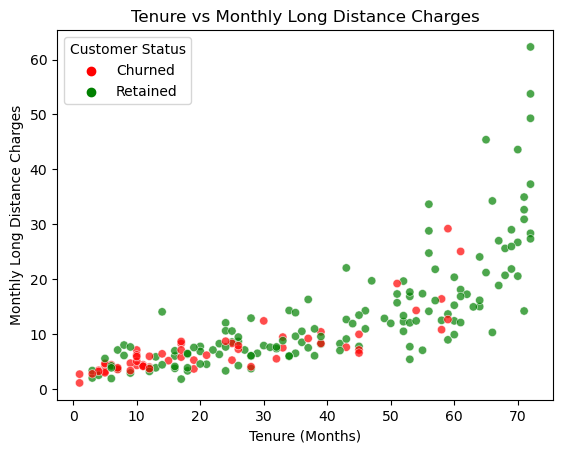

In [35]:
# 3. Tenure vs Long Distance Charges (Scatter)
fig3 = px.scatter(df, x='tenure', y='longmon', color='churn_label',
                  title='Tenure vs Long Distance Charges (Monthly)',
                  labels={'tenure': 'Tenure (months)', 'longmon': 'Monthly Long Distance Charges'},
                  hover_data=['income', 'age'],
                  color_discrete_map={'Retained': 'green', 'Churned': 'red'})

fig3.show()



#plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='longmon', hue='churn_label',
                palette={'Retained': 'green', 'Churned': 'red'}, alpha=0.7)
plt.title("Tenure vs Monthly Long Distance Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Long Distance Charges")
plt.legend(title="Customer Status")
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


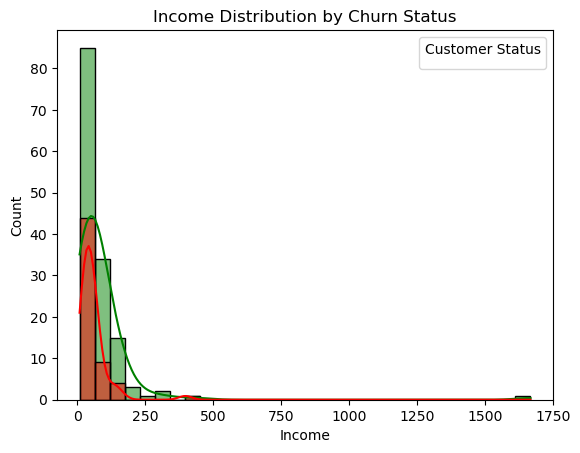

In [36]:
# 4. Income Distribution by Churn
fig4 = px.histogram(df, x='income', color='churn_label',
                    nbins=30, barmode='overlay', opacity=0.6,
                    title='Income Distribution by Churn Status',
                    color_discrete_map={'Retained': 'purple', 'Churned': 'Black'})
fig4.show()


#plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income', hue='churn_label', bins=30, kde=True,
             palette={'Retained': 'green', 'Churned': 'red'}, alpha=0.5)
plt.title("Income Distribution by Churn Status")
plt.xlabel("Income")
plt.ylabel("Count")
plt.legend(title="Customer Status")
plt.show()


In [37]:
# 5. Correlation Heatmap of Numerical Features
corr = df.drop(columns=['churn_label']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Use plotly heatmap with masking
fig5 = go.Figure(data=go.Heatmap(
    z=np.where(mask, np.nan, corr.values),
    x=corr.columns,
    y=corr.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlation'),
    hoverongaps=False
))
fig5.update_layout(title='Correlation Heatmap (Numerical Features)')

fig5.show()







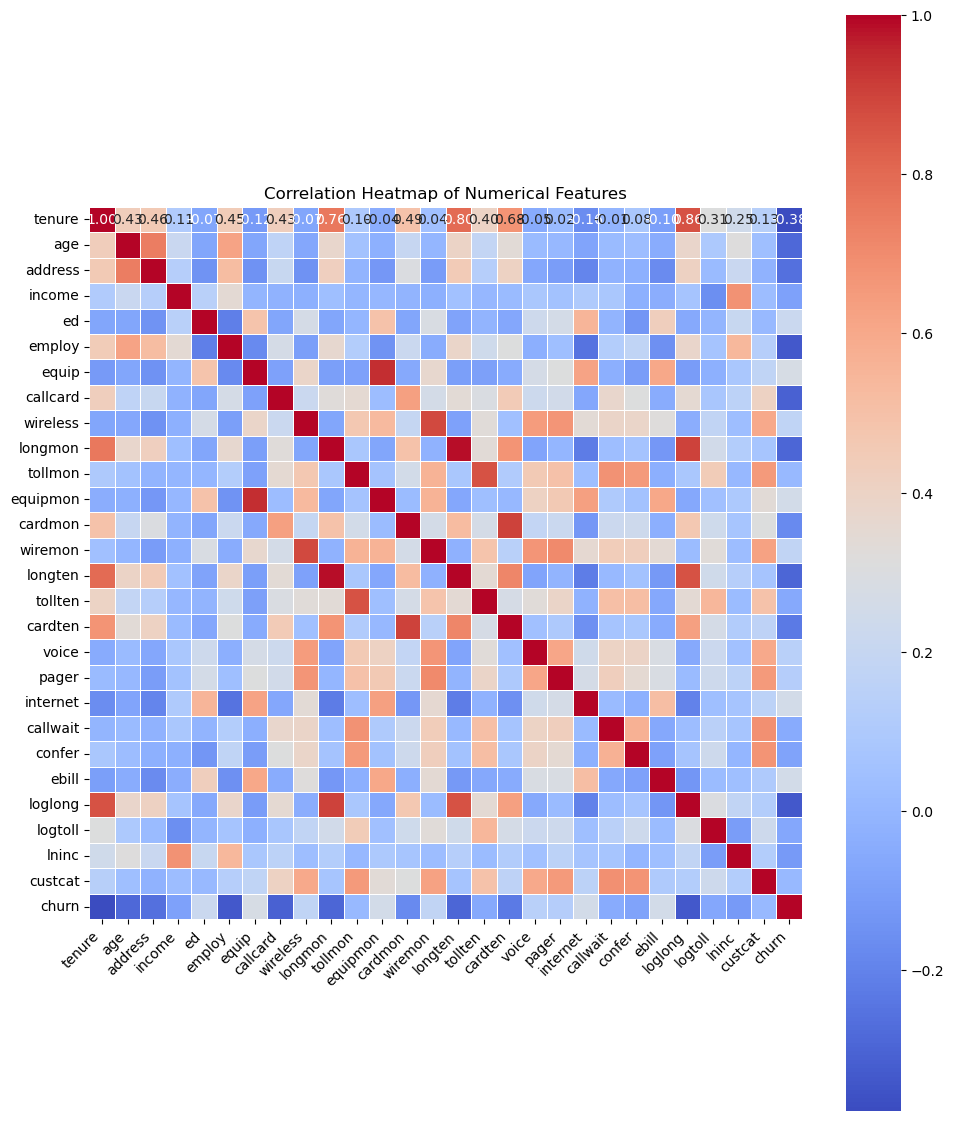

In [47]:
# Drop non-numeric column
numeric_df = df.drop(columns=['churn_label'])

# Compute correlation
corr = numeric_df.corr()

plt.figure(figsize=(10, 14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [40]:
churn_df = df[['tenure', 'age','address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3680\1231195017.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


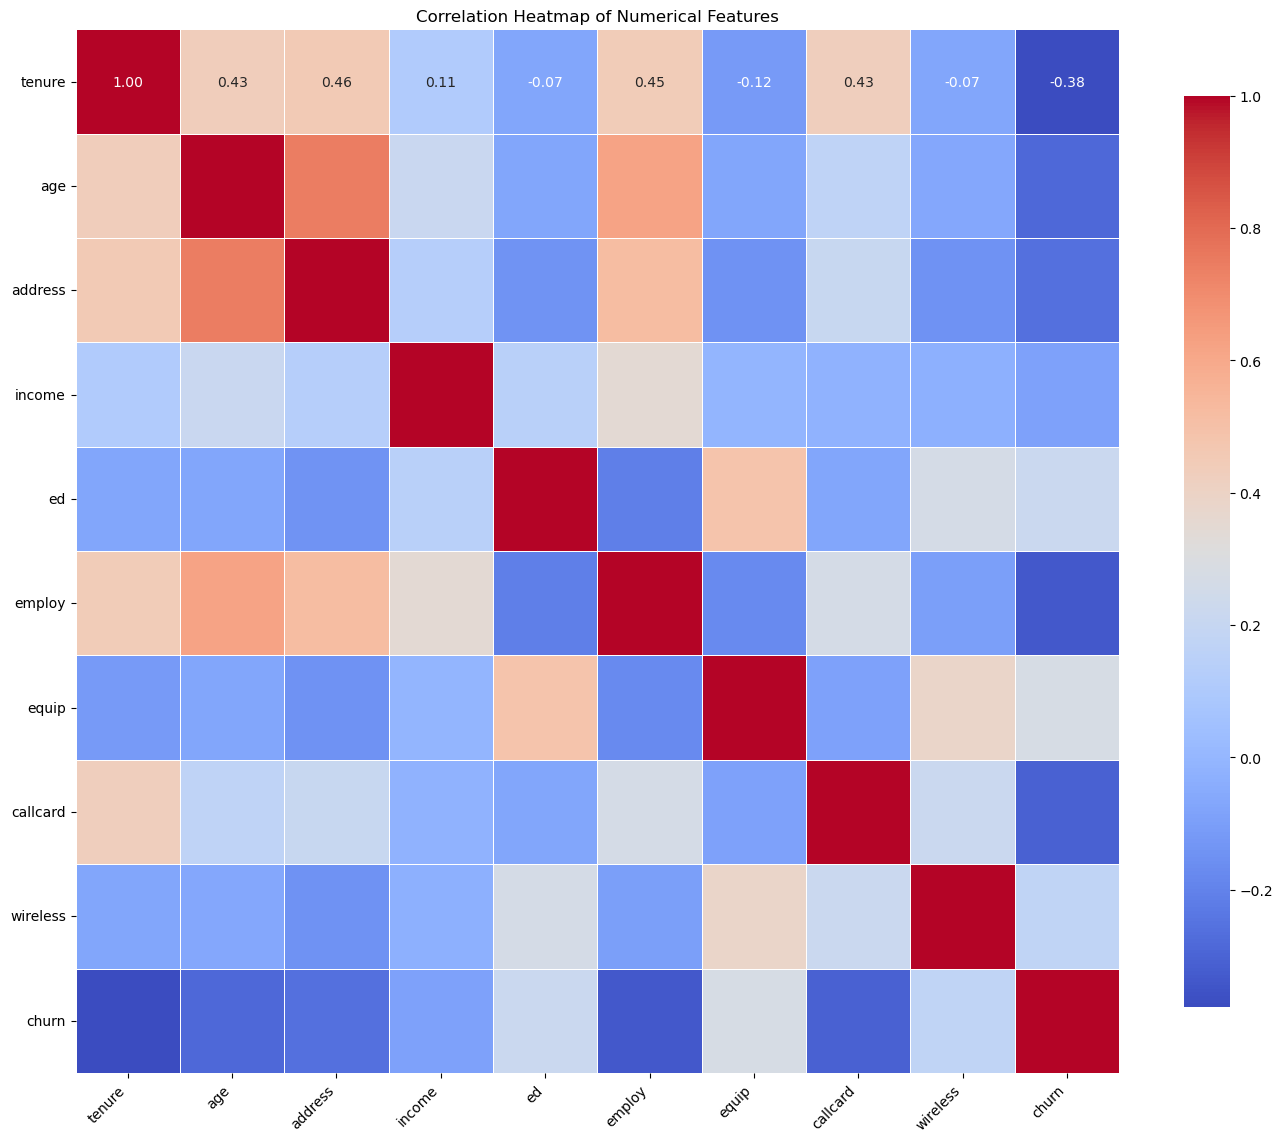

In [41]:


# Compute correlation
corr = churn_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<Axes: >

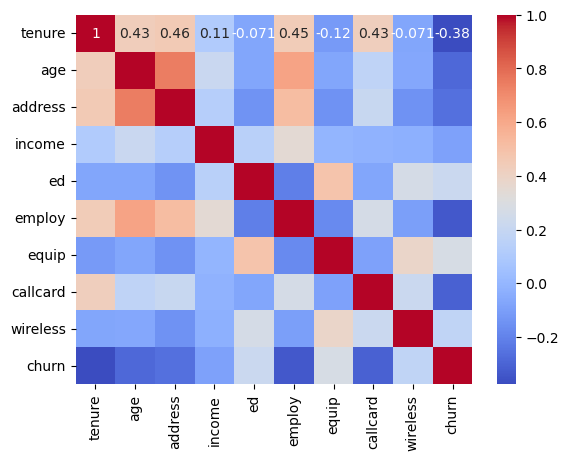

In [43]:
sns.heatmap(churn_df.corr(), annot=True, cmap='coolwarm')
